## Where it Pays to Attend College

Hypothesis: There is a correlation between Salaries, academic major taken and type of college attended. 

Null Hupothesis: There is no correlation between Salaries, academic major taken and type of college attended. 


In [1]:
# Import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib inline


## Load Project Data

In [2]:
# Get data files and read into a pandas dataframe
college_data = "Resources/salaries-by-college-type.csv"
region_data = "Resources/salaries-by-region.csv"
with open("Resources/costOfAttendence.csv", encoding="utf8", errors='ignore') as cost_data:
#cost_data = "Resources/costOfAttendence.csv"
# load colleges by state data

# Read the mouse data and the study results into a pandas dataframe
    college_data = pd.read_csv(college_data)
    region_data = pd.read_csv(region_data)
    cost_data = pd.read_csv(cost_data)
college_data.head()


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [3]:
region_data.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,California Institute of Technology (CIT),CA,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
1,Massachusetts Institute of Technology (MIT),MA,Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
2,Harvey Mudd College,CA,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,Stanford University,CA,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
4,Princeton University,NJ,Northeastern,"$66,500.00","$131,000.00","$68,900.00","$100,000.00","$190,000.00","$261,000.00"


In [4]:
#cost_data.head()

In [5]:
# Merge college data and region data dataframes
merged_data = pd.merge(college_data, region_data, how='right', on=['School Name',
                'Starting Median Salary',
                'Mid-Career Median Salary',
                'Mid-Career 10th Percentile Salary',
                'Mid-Career 25th Percentile Salary',
                'Mid-Career 75th Percentile Salary',
                'Mid-Career 90th Percentile Salary'])
merged_data.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,State,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",MA,Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,CA,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,CA,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",NY,Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,NY,Northeastern


In [6]:
# add cost Of Attendence to Merged dataframe
combined_merged_data = pd.merge(merged_data, cost_data, how='left',left_index=True, 
                        right_index=True,on=['School Name'])
#combined_merged_data.head()                  

In [7]:
# Determine the shape of the data, how many rows and columns
combined_merged_data.shape

(340, 14)

## Data Cleaning

In [8]:
# review data information to see the type of data, columns with missing values
combined_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        340 non-null    object
 1   School Type                        260 non-null    object
 2   Starting Median Salary             340 non-null    object
 3   Mid-Career Median Salary           340 non-null    object
 4   Mid-Career 10th Percentile Salary  292 non-null    object
 5   Mid-Career 25th Percentile Salary  340 non-null    object
 6   Mid-Career 75th Percentile Salary  340 non-null    object
 7   Mid-Career 90th Percentile Salary  292 non-null    object
 8   State                              333 non-null    object
 9   Region                             340 non-null    object
 10  Rank 2015                          340 non-null    int64 
 11  Rank 2014                          340 non-null    int64 
 12  Cost 201

In [9]:
# get an overview of the table statistics to see what needs to be cleaned
#combined_merged_data.describe()

In [10]:
# determine which columns have missing values, method 1
#combined_merged_data.columns[combined_merged_data.isnull().any()].tolist() 

In [11]:
# determine which columns have missing values, method 2
#combined_merged_data.loc[:, combined_merged_data.isnull().any()]

In [12]:
# count the number of missing values
#combined_merged_data.isnull().sum()
combined_merged_data.head()  

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,State,Region,Rank 2015,Rank 2014,Cost 2015,Cost 2014
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",MA,Northeastern,1,1,"$82,824","$82,824"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,CA,California,2,2,"$66,400","$55,496"
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,CA,California,3,5,"$64,988","$53,438"
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",NY,Northeastern,4,3,"$64,830","$50,800"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,NY,Northeastern,5,6,"$64,144","$45,396"


In [13]:
##covert data columns to numerical values in order to perform analysis on the data
# for multiple columns, put them in a list like so:
#cols = ['col1', 'col2', ..., 'colN']

cols = ['Starting Median Salary', 
        'Mid-Career Median Salary',
        'Mid-Career 10th Percentile Salary',
        'Mid-Career 25th Percentile Salary',
        'Mid-Career 75th Percentile Salary',
        'Mid-Career 90th Percentile Salary',
        'Cost 2015', 'Cost 2014']
combined_merged_data[cols] = combined_merged_data[cols].astype(str)

# pass them to df.replace(), specifying each char and it's replacement:
combined_merged_data[cols] = combined_merged_data[cols].replace({'\$': '', ',': '', '%': ''}, regex=True)
combined_merged_data[cols] = combined_merged_data[cols].astype(float)
combined_merged_data.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,State,Region,Rank 2015,Rank 2014,Cost 2015,Cost 2014
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,MA,Northeastern,1,1,82824.0,82824.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN,CA,California,2,2,66400.0,55496.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN,CA,California,3,5,64988.0,53438.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,NY,Northeastern,4,3,64830.0,50800.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN,NY,Northeastern,5,6,64144.0,45396.0


In [14]:
#use mode to fill in all the missing values in cols Mid-Career 10th/90th Percentile Salary
#### NOTE: data from School Type, Mid-Career 10th/90th Percentile Salary
# will not be used in the data analysis sections. this is just to make the data look pretty.
#combined_merged_data

In [15]:
#combined_merged_data ['Mid-Career 10th Percentile Salary'].mean()


## Data Manipulation

In [16]:
#create a dataframe for the data i want to analyze
regionSalary_df = combined_merged_data.loc[:,['School Name','State','Region','Starting Median Salary',
                'Mid-Career Median Salary','Cost 2014','Cost 2015']] 
regionSalary_df.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,Massachusetts Institute of Technology (MIT),MA,Northeastern,72200.0,126000.0,82824.0,82824.0
1,California Institute of Technology (CIT),CA,California,75500.0,123000.0,55496.0,66400.0
2,Harvey Mudd College,CA,California,71800.0,122000.0,53438.0,64988.0
3,"Polytechnic University of New York, Brooklyn",NY,Northeastern,62400.0,114000.0,50800.0,64830.0
4,Cooper Union,NY,Northeastern,62200.0,114000.0,45396.0,64144.0


In [17]:
# regionSalary_df.hist()
# plt.show()

In [18]:
#regionSalary_df.describe()

In [19]:
# Analysis: Starting Median Salary for college graduates is around  $46,000, 
#  by mid career avarage if about $84,000
#  average cost of college in 2015 was $55,000. 
# Assumption all other factors being equal- it is true these numbers will vary depending on college major and other factors.. 


In [20]:
#sort values by starting median salary, so that our graph will be in order
regionSalary_df.sort_values(by = 'Starting Median Salary', ascending = False, inplace=True)
regionSalary_df.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
1,California Institute of Technology (CIT),CA,California,75500.0,123000.0,55496.0,66400.0
0,Massachusetts Institute of Technology (MIT),MA,Northeastern,72200.0,126000.0,82824.0,82824.0
2,Harvey Mudd College,CA,California,71800.0,122000.0,53438.0,64988.0
260,Stanford University,CA,California,70400.0,129000.0,48965.0,49979.0
103,Princeton University,NJ,Northeastern,66500.0,131000.0,56050.0,58559.0


In [21]:
# create new index
regionSalary_df.reset_index(drop=True, inplace=True)
regionSalary_df.head(10)

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology (CIT),CA,California,75500.0,123000.0,55496.0,66400.0
1,Massachusetts Institute of Technology (MIT),MA,Northeastern,72200.0,126000.0,82824.0,82824.0
2,Harvey Mudd College,CA,California,71800.0,122000.0,53438.0,64988.0
3,Stanford University,CA,California,70400.0,129000.0,48965.0,49979.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,56050.0,58559.0
5,Rice University,TN,Southern,64000.0,110000.0,47789.0,49970.0
6,Harvard University,MA,Northeastern,63400.0,124000.0,56560.0,58495.0
7,"Polytechnic University of New York, Brooklyn",NY,Northeastern,62400.0,114000.0,50800.0,64830.0
8,Cooper Union,NY,Northeastern,62200.0,114000.0,45396.0,64144.0
9,Carnegie Mellon University (CMU),PA,Northeastern,61800.0,111000.0,60613.0,63860.0


In [22]:
# fig = plt.figure(figsize=(10,8))
# x = regionSalary_df['Region']
# y = regionSalary_df['Starting Median Salary']
# labels = TOPschoolsSalary_df['School Name']


# plt.bar(x,y, color='b', label = 'Starting Median Salary')
# plt.xticks(x, labels, rotation = 'vertical') #rotation = 'vertical'

# plt.xlabel('Region')
# plt.ylabel('US Dollars')
# plt.title('Starting Median Salary by Region')
# plt.legend()
# plt.show()

In [23]:
# median salaries of the Top 30 schools
TOPschoolsSalary_df=regionSalary_df.loc[0:29,:] 
TOPschoolsSalary_df

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology (CIT),CA,California,75500.0,123000.0,55496.0,66400.0
1,Massachusetts Institute of Technology (MIT),MA,Northeastern,72200.0,126000.0,82824.0,82824.0
2,Harvey Mudd College,CA,California,71800.0,122000.0,53438.0,64988.0
3,Stanford University,CA,California,70400.0,129000.0,48965.0,49979.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,56050.0,58559.0
5,Rice University,TN,Southern,64000.0,110000.0,47789.0,49970.0
6,Harvard University,MA,Northeastern,63400.0,124000.0,56560.0,58495.0
7,"Polytechnic University of New York, Brooklyn",NY,Northeastern,62400.0,114000.0,50800.0,64830.0
8,Cooper Union,NY,Northeastern,62200.0,114000.0,45396.0,64144.0
9,Carnegie Mellon University (CMU),PA,Northeastern,61800.0,111000.0,60613.0,63860.0


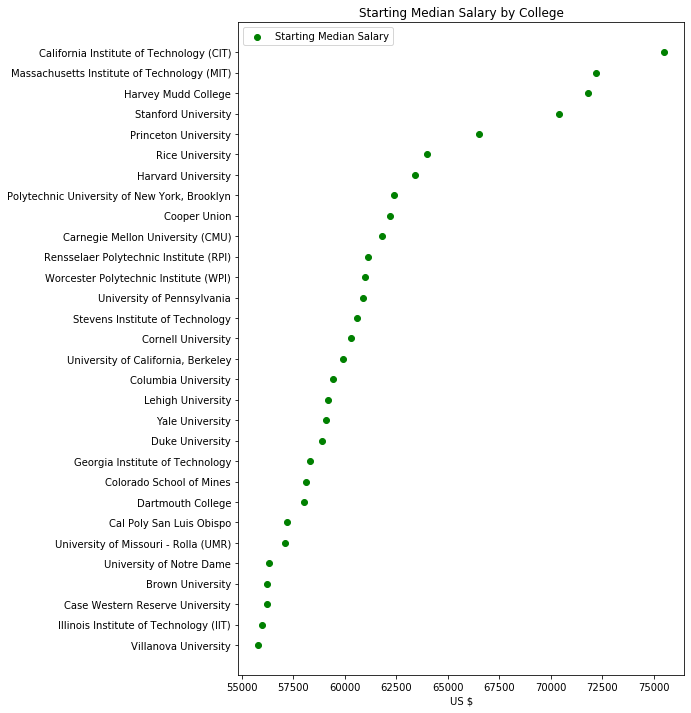

In [24]:
# create graph to show the median starting salary of the top 30 Colleges
# flip the graph to accomodate the school names along the Y axis

fig = plt.figure(figsize=(8,12))
x = TOPschoolsSalary_df['Starting Median Salary'] #switch x and y labels
y = TOPschoolsSalary_df.index
# invert the y axis to show from lowest to highest.
y=[len(y)-i for i in TOPschoolsSalary_df.index]
labels = TOPschoolsSalary_df['School Name']


plt.scatter(x, y, color='g', label = 'Starting Median Salary') 
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('') #hide label
plt.title('Starting Median Salary by College')
plt.legend(loc=2)
plt.show()

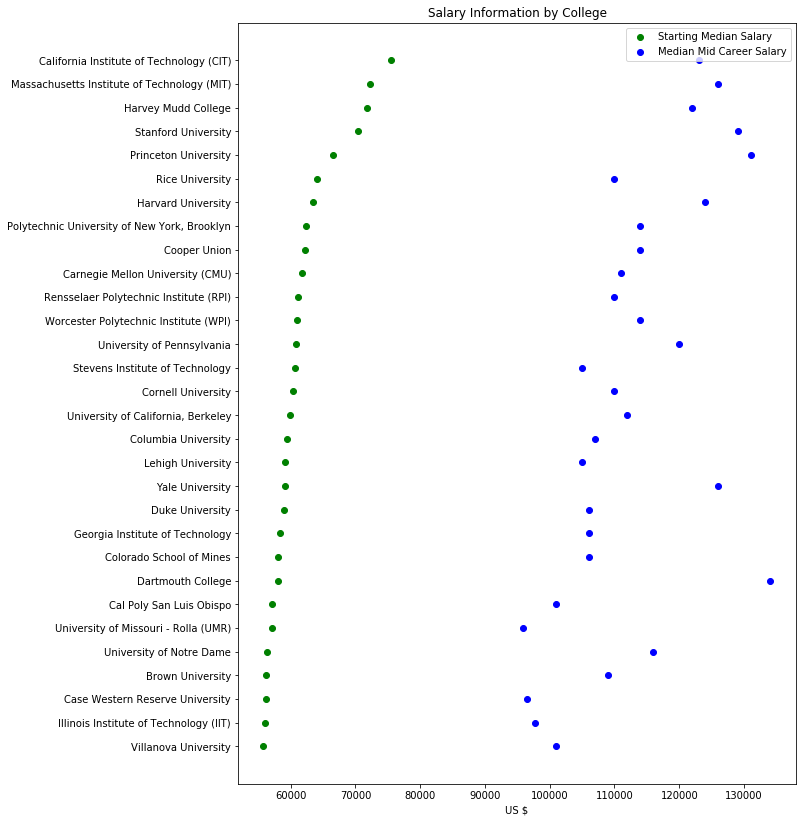

In [25]:
# plotting the Mid Career salaries
fig = plt.figure(figsize=(10,14))
x = TOPschoolsSalary_df['Starting Median Salary'] #switch x and y labels
y=[len(y)-i for i in TOPschoolsSalary_df.index]
#y=len(y)-TOPschoolsSalary_df.index

labels = TOPschoolsSalary_df['School Name']

plt.scatter(x, y, color='g', label = 'Starting Median Salary') 
plt.yticks(y, labels)

x2 = TOPschoolsSalary_df['Mid-Career Median Salary']
plt.scatter(x2, y, color='b', label = 'Median Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by College')
plt.legend(loc=1) #move the legend

# x3 = TOPschoolsSalary_df['Cost 2015']
# plt.scatter(x3, y, color='r', label = 'Cost 2015')

# plt.xlabel('US $')
# plt.ylabel('')
# plt.title('Salary Information by College')
# plt.legend(loc=1) #move the legend
plt.show()


In [26]:
#Setting up to use Plotly API within Jupyter notebook
# #Step1.  import required libraries:
# import numpy as np
# import pandas as pd

# # #Std plotly tools
# import chart_studio.plotly
# #import plotly.plotly as py -this module created -ImportError: The plotly.plotly module is deprecated, advised
# # to use chart_studio.plotly instead
# import plotly as py
# import plotly.graph_objs as go


In [27]:
#Step2. Set credentials using the set credential function
#plotly.tools.set_credentials_file.set_credentials_file(username='smwanzi', api_key='2Lo0koA48HtyJB8SENAD')'
#plotly.tools.set_credentials_file(username='smwanzi', api_key='2Lo0koA48HtyJB8SENAD')

In [28]:
regionSalary_df.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology (CIT),CA,California,75500.0,123000.0,55496.0,66400.0
1,Massachusetts Institute of Technology (MIT),MA,Northeastern,72200.0,126000.0,82824.0,82824.0
2,Harvey Mudd College,CA,California,71800.0,122000.0,53438.0,64988.0
3,Stanford University,CA,California,70400.0,129000.0,48965.0,49979.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,56050.0,58559.0


In [35]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from  plotly.offline import plot

#credentials_file(username='smwanzi', api_key='2Lo0koA48HtyJB8SENAD')

In [34]:
#import pandas as pd


for col in regionSalary_df.columns:
    regionSalary_df[col] = regionSalary_df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

regionSalary_df['text'] ='States'+ regionSalary_df['State'] + '<br>' + \
    ' Starting Median Salary ' + regionSalary_df['Starting Median Salary'] +'<br>' + \
    ' Mid-Career Median Salary ' + regionSalary_df['Mid-Career Median Salary'] #+ '<br>' + \

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = regionSalary_df['State'],
    z = regionSalary_df['Cost 2015'].astype(float),
    locationmode = 'USA-states',
    text = regionSalary_df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2015 Cost of Attending College by States vs Salary<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.sign_in('smwanzi', '2Lo0koA48HtyJB8SENAD')
py.iplot(fig, filename = 'd3-cloropleth-map')